<a href="https://colab.research.google.com/github/katezfire/Deeplearningproject1/blob/main/Zero_To_GANS_pj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('zero-to-gans-pj')
jovian.set_colab_id('1esyCz82P0Wzgx2fj7L-LEvUjtYUsnhGt')

#Deep Learning Project Using Worlds Best Artworks Image Dataset
For this Project I will be creating a Deep Learning Model to predict the Images using it's labels.

## Dataset Used:  "Best Artworks of All Time"
 https://www.kaggle.com/ikarus777/best-artworks-of-all-time

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

In [ ]:
dataset_url = 'https://www.kaggle.com/ikarus777/best-artworks-of-all-time'

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: katelynjefferson
Your Kaggle Key: ··········


  0%|          | 0.00/2.29G [00:00<?, ?B/s]

100%|██████████| 2.29G/2.29G [01:04<00:00, 38.3MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = './best-artworks-of-all-time/images/images'

##Data Exploration and Cleaning 
This is where I will remove data and check for any  inconsistencies

In [ ]:
import os

In [ ]:
os.listdir(data_dir)

['Claude_Monet',
 'Diego_Rivera',
 'Camille_Pissarro',
 'Francisco_Goya',
 'Caravaggio',
 'Andy_Warhol',
 'Alfred_Sisley',
 'Albrecht_DuΓòá├¬rer',
 'Leonardo_da_Vinci',
 'Edvard_Munch',
 'Raphael',
 'Vincent_van_Gogh',
 'Andrei_Rublev',
 'Hieronymus_Bosch',
 'William_Turner',
 'Sandro_Botticelli',
 'Michelangelo',
 'Kazimir_Malevich',
 'Joan_Miro',
 'Pieter_Bruegel',
 'Edgar_Degas',
 'Rembrandt',
 'Rene_Magritte',
 'Giotto_di_Bondone',
 'Gustave_Courbet',
 'Titian',
 'Henri_de_Toulouse-Lautrec',
 'Gustav_Klimt',
 'Eugene_Delacroix',
 'Pablo_Picasso',
 'Mikhail_Vrubel',
 'El_Greco',
 'Jackson_Pollock',
 'Piet_Mondrian',
 'Paul_Gauguin',
 'Peter_Paul_Rubens',
 'Pierre-Auguste_Renoir',
 'Paul_Klee',
 'Edouard_Manet',
 'Henri_Rousseau',
 'Albrecht_Du╠êrer',
 'Paul_Cezanne',
 'Diego_Velazquez',
 'Marc_Chagall',
 'Georges_Seurat',
 'Vasiliy_Kandinskiy',
 'Salvador_Dali',
 'Henri_Matisse',
 'Amedeo_Modigliani',
 'Jan_van_Eyck',
 'Frida_Kahlo']

In [ ]:
for cls in os.listdir(data_dir):
  print(cls, ':', len(os.listdir(data_dir + '/' + cls)))

Claude_Monet : 73
Diego_Rivera : 70
Camille_Pissarro : 91
Francisco_Goya : 291
Caravaggio : 55
Andy_Warhol : 181
Alfred_Sisley : 259
Albrecht_DuΓòá├¬rer : 328
Leonardo_da_Vinci : 143
Edvard_Munch : 67
Raphael : 109
Vincent_van_Gogh : 877
Andrei_Rublev : 99
Hieronymus_Bosch : 137
William_Turner : 66
Sandro_Botticelli : 164
Michelangelo : 49
Kazimir_Malevich : 126
Joan_Miro : 102
Pieter_Bruegel : 134
Edgar_Degas : 702
Rembrandt : 262
Rene_Magritte : 194
Giotto_di_Bondone : 119
Gustave_Courbet : 59
Titian : 255
Henri_de_Toulouse-Lautrec : 81
Gustav_Klimt : 117
Eugene_Delacroix : 31
Pablo_Picasso : 439
Mikhail_Vrubel : 171
El_Greco : 87
Jackson_Pollock : 24
Piet_Mondrian : 84
Paul_Gauguin : 311
Peter_Paul_Rubens : 141
Pierre-Auguste_Renoir : 336
Paul_Klee : 188
Edouard_Manet : 90
Henri_Rousseau : 70
Albrecht_Du╠êrer : 328
Paul_Cezanne : 47
Diego_Velazquez : 128
Marc_Chagall : 239
Georges_Seurat : 43
Vasiliy_Kandinskiy : 88
Salvador_Dali : 139
Henri_Matisse : 186
Amedeo_Modigliani : 193
Jan

In [ ]:
#Removing all folders with less than 200 photos to make it easier to run the model 

import glob

for cls in os.listdir(data_dir):
  if len(os.listdir(data_dir + '/' + cls)) <= 200:
    file = glob.glob(data_dir + '/' + cls + '/*')
    for f in file:
      os.remove(f)
    if len(os.listdir(data_dir + '/' + cls)) == 0: 
      os.rmdir(data_dir + '/' + cls)


In [ ]:
for cls in os.listdir(data_dir):
  print(cls, ':', len(os.listdir(data_dir + '/' + cls)))

Francisco_Goya : 291
Alfred_Sisley : 259
Albrecht_DuΓòá├¬rer : 328
Vincent_van_Gogh : 877
Edgar_Degas : 702
Rembrandt : 262
Titian : 255
Pablo_Picasso : 439
Paul_Gauguin : 311
Pierre-Auguste_Renoir : 336
Albrecht_Du╠êrer : 328
Marc_Chagall : 239


## Import Dataset Into Pytorch
Use the ImageFolder Class From torchvision

In [ ]:
from torchvision.datasets import ImageFolder

In [ ]:
dataset = ImageFolder(data_dir)

In [ ]:
len(dataset)

4627

In [ ]:
dataset[0]

(<PIL.Image.Image image mode=RGB size=720x1024 at 0x7F0344802A20>, 0)

In [ ]:
dataset.classes

['Albrecht_DuΓòá├¬rer',
 'Albrecht_Du╠êrer',
 'Alfred_Sisley',
 'Edgar_Degas',
 'Francisco_Goya',
 'Marc_Chagall',
 'Pablo_Picasso',
 'Paul_Gauguin',
 'Pierre-Auguste_Renoir',
 'Rembrandt',
 'Titian',
 'Vincent_van_Gogh']

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

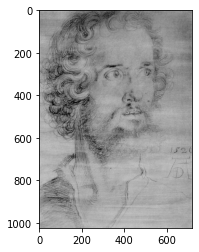

In [ ]:
img, label = dataset[0]
plt.imshow(img)

In [ ]:
import torchvision.transforms as tt
dataset = ImageFolder(data_dir, tt.Compose([tt.Resize(64),tt.RandomCrop(64),
                                            tt.ToTensor()]))

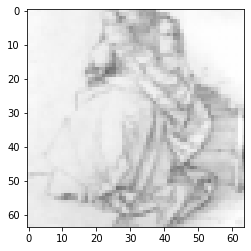

In [ ]:
img, label = dataset[200]
plt.imshow(img.permute(1,2,0))

In [ ]:
#This block of code picks out parts of the dataset to make a traning model and validation model 
val_pct = 0.1
val_size = int(val_pct * len(dataset))
train_size = len(dataset) - val_size

train_size, val_size

(4165, 462)

In [ ]:
from torch.utils.data import random_split

train_ds, valid_ds = random_split(dataset,[train_size, val_size])
len(train_ds) , len(valid_ds)

(4165, 462)

In [ ]:
from torch.utils.data.dataloader import DataLoader

batch_size = 128

train_dl = DataLoader(train_ds, 
                      batch_size, 
                      shuffle=True, 
                      num_workers=4, 
                      pin_memory=True)
valid_dl = DataLoader(valid_ds, 
                    batch_size, 
                    num_workers=4, 
                    pin_memory=True)

In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

##GPU Utilities

In [ ]:
import torch

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = get_default_device()

In [ ]:
device

device(type='cuda')

In [ ]:
img, label = dataset[0]

In [ ]:
img.device

device(type='cpu')

In [ ]:
 #This part of code is checking to see if the code detects a gpu running
img_gpu = to_device(img, device)
img_gpu.device

device(type='cuda', index=0)

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

## Model and Training Utilties

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

##Model

In [ ]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        self.classifier = nn.Sequential(nn.AdaptiveMaxPool2d(1), # 128 x 512 x 1 x 1 
                                        nn.Flatten(), # 128 x 512
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [ ]:
model = to_device(ResNet9(3, len(dataset.classes)), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [ ]:
model.conv1[0].weight.device

device(type='cuda', index=0)

Pass one batch of input tensor through model

In [ ]:
torch.cuda.empty_cache()
for batch in train_dl:
    images, labels = batch
    print('images.shape', images.shape)
    print('images.device', images.device)
    preds = model(images)
    print('preds.shape', preds.shape)
    break

images.shape torch.Size([128, 3, 64, 64])
images.device cuda:0
preds.shape torch.Size([128, 12])


## Model Running

In [ ]:
history = [evaluate(model, valid_dl)]
history

[{'val_acc': 0.049379006028175354, 'val_loss': 2.487276077270508}]

In [ ]:
history += fit(5, 0.001, model, train_dl, valid_dl, torch.optim.Adam)

Epoch [0], train_loss: 2.1485, val_loss: 2.1658, val_acc: 0.3261
Epoch [1], train_loss: 1.5765, val_loss: 1.6025, val_acc: 0.4325
Epoch [2], train_loss: 1.4297, val_loss: 1.3955, val_acc: 0.4837
Epoch [3], train_loss: 1.3345, val_loss: 1.3832, val_acc: 0.5138
Epoch [4], train_loss: 1.2780, val_loss: 1.3855, val_acc: 0.5049


In [ ]:
history += fit(5, 0.001, model, train_dl, valid_dl, torch.optim.Adam)

Epoch [0], train_loss: 1.4249, val_loss: 1.3572, val_acc: 0.4876
Epoch [1], train_loss: 1.2642, val_loss: 1.2107, val_acc: 0.5626
Epoch [2], train_loss: 1.1204, val_loss: 1.5572, val_acc: 0.4714
Epoch [3], train_loss: 1.0637, val_loss: 1.2628, val_acc: 0.5262
Epoch [4], train_loss: 0.9600, val_loss: 1.1252, val_acc: 0.5597


In [ ]:
history += fit(5, 0.0001, model, train_dl, valid_dl, torch.optim.Adam)

Epoch [0], train_loss: 0.7991, val_loss: 0.9463, val_acc: 0.6374
Epoch [1], train_loss: 0.7605, val_loss: 0.9166, val_acc: 0.6303
Epoch [2], train_loss: 0.7057, val_loss: 0.8998, val_acc: 0.6770
Epoch [3], train_loss: 0.6843, val_loss: 0.8663, val_acc: 0.6640
Epoch [4], train_loss: 0.6580, val_loss: 0.8698, val_acc: 0.6589


In [ ]:
history += fit(5, 0.0001, model, train_dl, valid_dl)

Epoch [0], train_loss: 0.6544, val_loss: 0.8768, val_acc: 0.6686
Epoch [1], train_loss: 0.6368, val_loss: 0.8608, val_acc: 0.6542
Epoch [2], train_loss: 0.6272, val_loss: 0.8777, val_acc: 0.6303
Epoch [3], train_loss: 0.6158, val_loss: 0.8717, val_acc: 0.6347
Epoch [4], train_loss: 0.6392, val_loss: 0.8757, val_acc: 0.6411


#Graphing to see accuarcy of the model

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

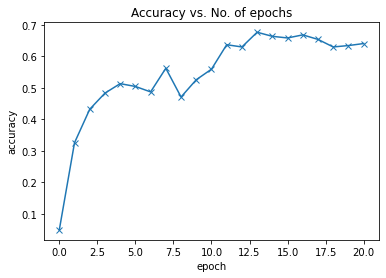

In [ ]:
plot_accuracies(history)


#Comparing the traning data to the loss data

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

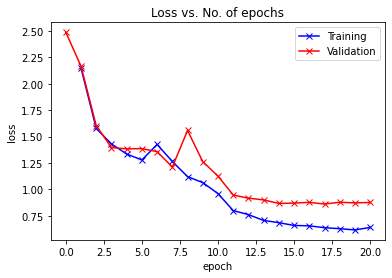

In [ ]:
plot_losses(history)

In [ ]:
history[-1]

{'train_loss': 0.6391952037811279,
 'val_acc': 0.6411257982254028,
 'val_loss': 0.87574303150177}

In [ ]:
jovian.reset()
jovian.log_dataset(image_size=64)
jovian.log_hyperparams(batch_size=128, 
                       arch='ResNet9', 
                       epochs=[5, 5, 5, 5], 
                       lrs=[0.001, 0.001, 1e-4, 1e-4],
                       opt=['Adam', 'Adam', 'Adam', 'SGD'])
jovian.log_metrics(train_loss=history[-1]['train_loss'],
                   val_acc=history[-1]['val_acc'],
                   val_loss=history[-1]['val_loss'])

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Dataset logged.
[jovian] Hyperparams logged.
[jovian] Metrics logged.


##Testing the Model on Individual photos

In [ ]:
def predict_image(img, model, classes):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return classes[preds[0].item()]

In [ ]:
def show_image_prediction(img, label):
    plt.imshow(img.permute((1, 2, 0)))
    pred = predict_image(img, model, dataset.classes)
    print('Target:', dataset.classes[label])
    print('Prediction:', pred)

Target: Pablo_Picasso
Prediction: Edgar_Degas


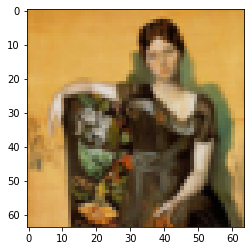

In [ ]:
show_image_prediction(*valid_ds[100])

Target: Edgar_Degas
Prediction: Edgar_Degas


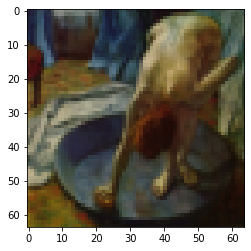

In [ ]:
show_image_prediction(*valid_ds[300])

Target: Alfred_Sisley
Prediction: Alfred_Sisley


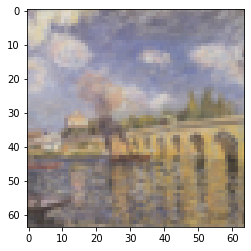

In [ ]:
show_image_prediction(*valid_ds[12])

##Conclusions 

This project was a grat first Deep Learning project to work on I was able to work with two things I love coding in python and art. While going through the Jovian course work and working with different models I knew I wanted to create a project that would be able to predict outcomes and I'm happy I was able to say I created a Deep Learning Model to predict a an outcome correctly. Some further projects I would like to work on is predicting the next covid outbreaks and predicitng the likely cause of death of a person in New York City based off of their age and race. I feel this course and project has geared me with the tools to do so and I can't wait to embark on my deep learning journey!
